In [79]:
# Initialize Otter
import otter
grader = otter.Notebook("lab01.ipynb")

In [80]:
import pandas as pd
from datetime import date

# Lab 1: Using Pandas

*This lab heavily inspired by [Data 198 Module 2](https://github.com/ds-modules/DATA-198-SP21/blob/main/module_2/module2.ipynb), [Data 88E Lab 9](https://github.com/data-88e/fa22-dev/blob/main/lab/lab09/lab09.ipynb).*

The `pandas` module is a powerful library for manipulating and analyzing data. In this lab, you will use what you learned in lecture, as well as the `pandas` documentation, to manipulate and analyze some example datasets.

**Learning Objectives**  

By the end of this lab, you should be able to work with datasets with basic Pandas methods, including
- Read a `.csv` file into a `pandas` dataframe
- Select certain columns from a dataframe
- Filter a dataframe
- Use the `pandas` documentation to complete a certain data manipulation task (e.g. a join)

## Section 1: Price Data Over Time

We begin by importing an example dataset that tells us the price of some good over time.

**Question 1.1:** Import the data from the `prices.csv` file into a dataframe named `prices_raw`.

In [81]:
prices_raw = pd.read_csv("prices.csv")
prices_raw

,year,month,price
0,2003.0,1.0,100.52
1,2003.0,2.0,100.71
2,2003.0,3.0,100.95
3,2003.0,4.0,101.29
4,2003.0,5.0,101.38
...,...,...,...
103,2011.0,8.0,119.96
104,2011.0,9.0,120.06
105,2011.0,10.0,120.27
106,2011.0,11.0,120.39


In [82]:
grader.check("q1_1")

q1_1 results: All test cases passed!

First, we want to add a `date` row to this table that tells us the date, as a [Python date object](https://docs.python.org/3/library/datetime.html#datetime.date), of the entry. Let's define a function that, given a row, tells us the date of that row based on its `year` and `month`:

In [83]:
def date_of_row(row):
    return date(int(row['year']), int(row['month']), 1)

As an example, let's see what this function returns when applied to the first row:

In [84]:
date_of_row(prices_raw.iloc[0])

datetime.date(2003, 1, 1)

This looks good. So how do we apply it to every row in the table? Let's look at [the `pandas` documentation for the `apply` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html).

<!-- BEGIN QUESTION -->

**Question 1.2:** What is the `func` argument? What should we pass for the `func` argument in this case?

The func arg is just a param in which a function needs to be passed in.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.3:** What is the `axis` argument? What should we pass for the `axis` argument in this case?

This is where the function will be applied. You can choose to apply it to either rows or columns.

<!-- END QUESTION -->

**Question 1.4:** Now, construct a `date_column` using the `apply` function. 

In [85]:
date_column = prices_raw.apply(date_of_row, axis=1)
date_column

0      2003-01-01
1      2003-02-01
2      2003-03-01
3      2003-04-01
4      2003-05-01
          ...    
103    2011-08-01
104    2011-09-01
105    2011-10-01
106    2011-11-01
107    2011-12-01
Length: 108, dtype: object

In [86]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5:** Now we want to add the dates as a new column to `prices_raw`. Construct `prices_raw_with_date`, a dataframe containing all of the columns of `prices_raw`, as well as a `date` column with values from `date_column`.

In [87]:
prices_raw_with_date = prices_raw.copy() # make a copy of prices_raw
prices_raw_with_date["date"] = date_column.values
prices_raw_with_date

,year,month,price,date
0,2003.0,1.0,100.52,2003-01-01
1,2003.0,2.0,100.71,2003-02-01
2,2003.0,3.0,100.95,2003-03-01
3,2003.0,4.0,101.29,2003-04-01
4,2003.0,5.0,101.38,2003-05-01
...,...,...,...,...
103,2011.0,8.0,119.96,2011-08-01
104,2011.0,9.0,120.06,2011-09-01
105,2011.0,10.0,120.27,2011-10-01
106,2011.0,11.0,120.39,2011-11-01


In [88]:
grader.check("q1_5")

q1_5 results: All test cases passed!

Note that another way to construct a new table with this new column is to use the [`assign` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html). The documentation might be a little confusing to read; when `**kwargs` is a parameter to a function, such as `assign`, it means that we can set its keywords and values like so:
```python
prices_raw.assign(keyword0=value0, keyword1=value1, keyword2=value2, ...)
```
The documentation says that, for the `assign` function, "the [new] column names are keywords," so in this case, the keywords are the new column names, and the value corresponding a keyword is the data for that new column.

**Question 1.6:** Create a new table, `prices`, that contains only the `date` and `price` columns, in that order, from the `prices_raw_with_date` table.

In [89]:
prices = prices_raw_with_date[["date", "price"]]
prices

,date,price
0,2003-01-01,100.52
1,2003-02-01,100.71
2,2003-03-01,100.95
3,2003-04-01,101.29
4,2003-05-01,101.38
...,...,...
103,2011-08-01,119.96
104,2011-09-01,120.06
105,2011-10-01,120.27
106,2011-11-01,120.39


In [90]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7:** Now, we can filter the dataframe like we did in lecture. For example, we could get all rows where the price is between 105 and 115, exclusive. Put all of these rows in a new dataframe, `filtered_prices`.

In [91]:
filtered_prices = prices_raw_with_date.query("105 < price < 115")
filtered_prices.head()

,year,month,price,date
19,2004.0,8.0,105.04,2004-08-01
20,2004.0,9.0,105.20,2004-09-01
21,2004.0,10.0,105.63,2004-10-01
22,2004.0,11.0,105.81,2004-11-01
23,2004.0,12.0,105.93,2004-12-01


In [92]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 1.8:** Make a new dataframe that contains just the first 5 rows of `filtered_prices` and assign it to `filtered_prices_subset`. 

Hint: Be careful if you choose to use `.loc` because the index does not start from 0. `.iloc` may be a better choice. 

In [93]:
filtered_prices_subset = filtered_prices.head()
filtered_prices_subset

,year,month,price,date
19,2004.0,8.0,105.04,2004-08-01
20,2004.0,9.0,105.20,2004-09-01
21,2004.0,10.0,105.63,2004-10-01
22,2004.0,11.0,105.81,2004-11-01
23,2004.0,12.0,105.93,2004-12-01


In [94]:
grader.check("q1_8")

q1_8 results: All test cases passed!

Now, we can do some data analysis with the `filtered_prices` dataframe. We will discuss more advanced plotting later in the course. For now, we can make a simple plot using [the `plot` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html):

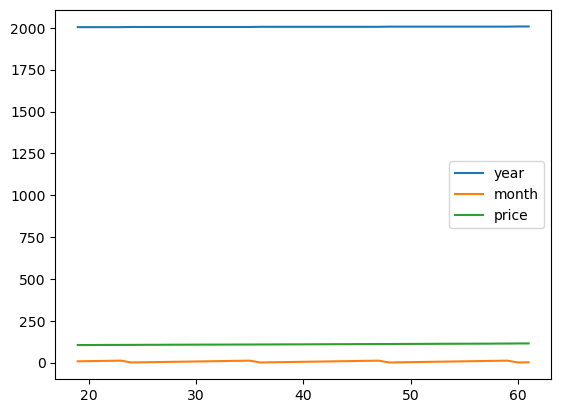

In [95]:
filtered_prices.plot();

**Question 1.9:** The x-axis doesn't tell us much here. By reindexing the dataframe to the `date` column, we can make the x-axis more clear. Plot the data after reindexing `filtered_prices` on the `date` column.

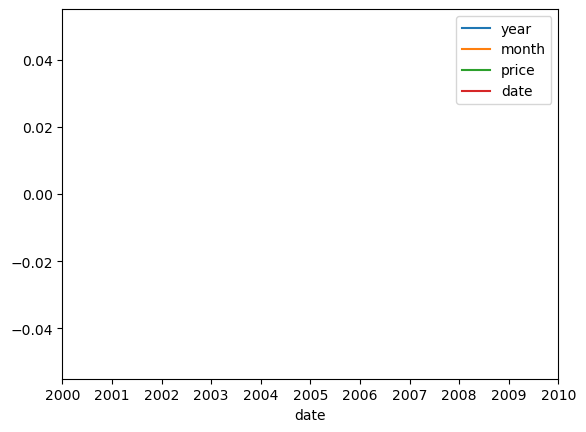

In [96]:
reindexed_filtered_prices = filtered_prices.reindex(filtered_prices["date"])
reindexed_filtered_prices.plot();

In [97]:
grader.check("q1_9")

q1_9 results: All test cases passed!

## Section 2: Constructing a Phillips Curve

In this example, we'll construct a Phillips curve, showing the relationship between unemployment and inflation. To start, we'll import `unemployment.csv` and `core_inflation.csv` into two dataframes, `unemployment` and `inflation`, respectively. 

The datasets are from [Federal Reserve Economic Data (FRED)](https://fred.stlouisfed.org/), a classical and very accessible data source for economics. We will also learn about how to get data from FRED using an API later! But for now, let's import the data manually. 

In [98]:
unemployment = pd.read_csv('unemployment.csv') # UNRATE
inflation = pd.read_csv('core_inflation.csv') # CPILFESL_PC1

In [99]:
unemployment

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
895,2022-08-01,3.7
896,2022-09-01,3.5
897,2022-10-01,3.7
898,2022-11-01,3.6


In [100]:
inflation

,DATE,CPILFESL_PC1
0,1958-01-01,2.79720
1,1958-04-01,2.42775
2,1958-07-01,2.06659
3,1958-10-01,1.82232
4,1959-01-01,1.81406
...,...,...
255,2021-10-01,5.00808
256,2022-01-01,6.29779
257,2022-04-01,6.01857
258,2022-07-01,6.29602


In order to combine these two datasets, we are going to perform an *inner join*. This will construct a new table that only contains rows where the value of `DATE` is the same in both tables. By doing so, we will be able to plot a graph where a point represents the inflation rate and federal funds rate *at the same point in time*. In `pandas`, to join two dataframes, we use the [`merge` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html). Take a look at the documentation, and use it to answer the following questions.

<!-- BEGIN QUESTION -->

**Question 2.1:** What should we pass for the `right` argument in this case?

This should be the df you want to merge, in this case, the inflation df.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.2:** What is the `how` argument? What should we pass for the `how` argument in this case?

"inner" should be passed since we want to conduct an inner join.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.3:** Take a look at the `on`, `left_on`, and `right_on` arguments. Note that for both tables, the name of the date column, `DATE`, is the same. Which of the `on`, `left_on`, and `right_on` arguments do we need to pass in this case, and what values should they take on?

On is the correct answer since both df's have a DATE column.

<!-- END QUESTION -->

**Question 2.4:** Based on the answers to the previous questions, construct `phillips_curve_df`, a dataframe with `DATE`, `CPILFESL_PC1`, and `FEDFUNDS` columns by merging the `unemployment` and `inflation` dataframes.

In [101]:
phillips_curve_df = unemployment.merge(inflation, on="DATE")
phillips_curve_df

,DATE,UNRATE,CPILFESL_PC1
0,1958-01-01,5.8,2.79720
1,1958-04-01,7.4,2.42775
2,1958-07-01,7.5,2.06659
3,1958-10-01,6.7,1.82232
4,1959-01-01,6.0,1.81406
...,...,...,...
255,2021-10-01,4.5,5.00808
256,2022-01-01,4.0,6.29779
257,2022-04-01,3.6,6.01857
258,2022-07-01,3.5,6.29602


In [102]:
grader.check("q2_4")

q2_4 results: All test cases passed!

And now we can graph our empirical Phillips curve!

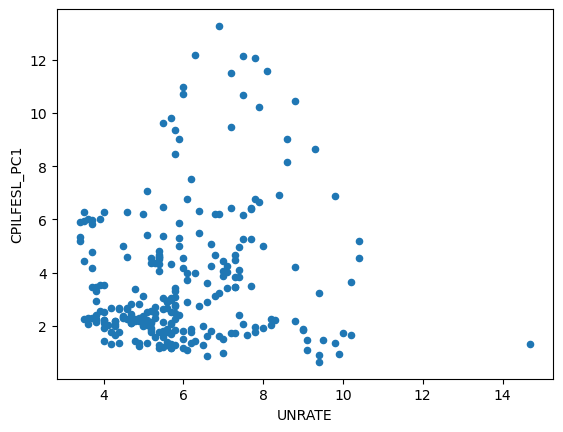

In [103]:
phillips_curve_df.plot.scatter('UNRATE', 'CPILFESL_PC1');

<!-- BEGIN QUESTION -->

**Question 2.5:** How does this empirical Phillips curve match with your expectation? 

Note: If you are not familiar with Phillips curve, feel free to skim through [this chapter](https://data-88e.github.io/textbook/content/09-macro/phillips_curve.html) from Data 88E. 

This doesn't really match with the Phillips Curve, which is suppoised to show an inverse relationship between inflation and unemployment. This means that if inflation rises, the unemployment rate goes up and vice versa. Here we see many scattered and seemingly uncorrelated points.

<!-- END QUESTION -->

Congratulations! You're done with Econ 148 Lab 1!

## Feedback

**Question 3:** Please fill out this short [feedback form](https://forms.gle/jCG7VvhptpzTfTFG6) to let us know your thoughts on this lab! We really appreciate your opinions and feedbacks! At the end of the Google form, you should see a codeword. Assign the codeword to the variable `codeword` below. 

In [104]:
codeword = "iloc"

In [105]:
grader.check("q3")

q3 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [106]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1_1 results: All test cases passed!

    q1_4 results: All test cases passed!

    q1_5 results: All test cases passed!

    q1_6 results: All test cases passed!

    q1_7 results: All test cases passed!

    q1_8 results: All test cases passed!

    q1_9 results: All test cases passed!

    q2_4 results: All test cases passed!

    q3 results:
        q3 - 1 result:
            ❌ Test case failed
            Trying:
                sum([ord(c) for c in codeword])^0xec148 == 966895
            Expecting:
                True
            **********************************************************************
            Line 1, in q3 0
            Failed example:
                sum([ord(c) for c in codeword])^0xec148 == 966895
            Exception raised:
                Traceback (most recent call last):
                  File "/opt/conda/l